In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vgg_data = pd.read_csv('./vgg19_results.csv')

In [3]:
incorrect = vgg_data[vgg_data['correct'] == 'n']
categories = set(incorrect['true label'])
occurrences = {}
for category in categories:
    occurrences[category] = len(incorrect[incorrect['true label'] == category])

x = [cat for cat in occurrences.keys()]
occ = [occur for occur in occurrences.values()]
total = [395, 386, 399, 389, 390, 357, 387, 419, 409, 394]
proportion = [round(occ[i]/total[i], 3) for i in range(len(total))]

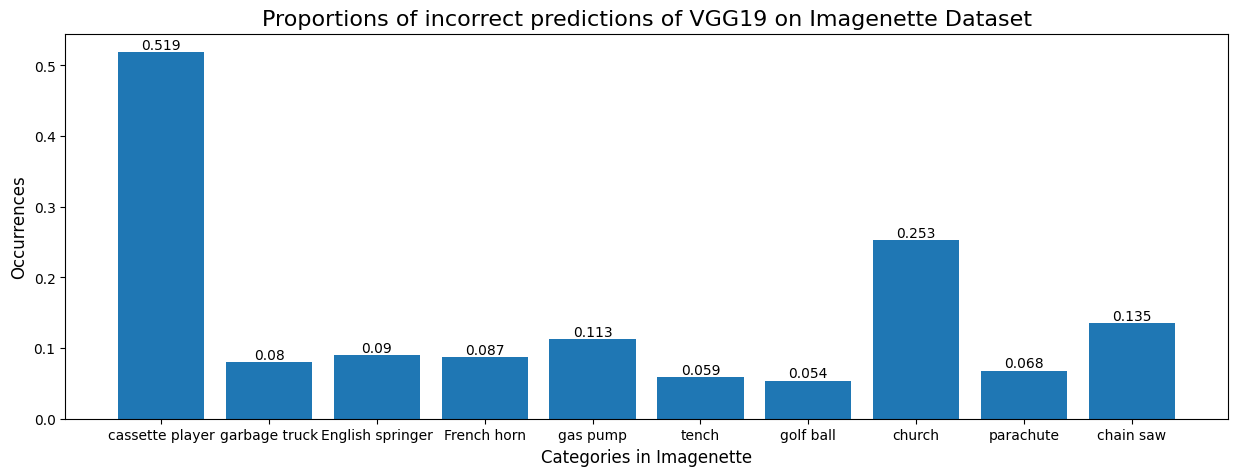

In [4]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 5))
bar_container = ax.bar(x, proportion)
ax.bar_label(bar_container)
ax.set_xlabel('Categories in Imagenette', fontsize=12)
ax.set_ylabel('Occurrences', fontsize=12)
ax.set_title('Proportions of incorrect predictions of VGG19 on Imagenette Dataset', fontsize=16)
plt.savefig('occurrence_incorrect.png')

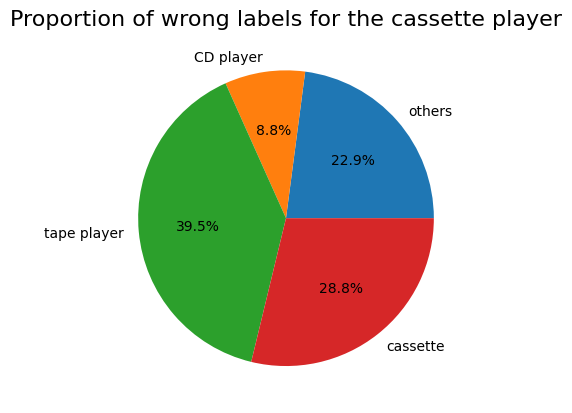

In [6]:
cassette = incorrect[incorrect['true label'] == 'cassette player']
wrong_label = set(('CD player', 'cassette', 'tape player', 'others'))
wrong_occ = []
wrong_occ.append(len(cassette[cassette['predicted label'] == 'CD player']))
wrong_occ.append(len(cassette[cassette['predicted label'] == 'cassette']))
wrong_occ.append(len(cassette[cassette['predicted label'] == 'tape player']))
wrong_occ.append(len(cassette) - wrong_occ[0] - wrong_occ[1] - wrong_occ[2])
fig, ax = plt.subplots()
ax.pie(wrong_occ, labels=wrong_label, autopct='%1.1f%%')
ax.set_title('Proportion of wrong labels for the cassette player', fontsize=16)
plt.savefig('wrong_cassette.png')